# Step 5: Build final models with tuned hyperparameters
Anndi Russell: Capstone


The purpose of this program is to build a final classifier model for each of the 8 justices. The hyperparemeters were tuned in the step 4 notebook. These are the final models.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

#other sklearn tools
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support

#NLP tools
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [96]:
def tokenizerporter(text):
    return [porter.stem(word) for word in text.split()]
def tokenizer(text):
    return text.split()
nltk.download('stopwords')
stop = stopwords.words('english')
porter = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anndi.russell/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Breyer

Best parameter set:<br>

- 'clf__alpha': 0.0001<br>
- 'clf__n_iter_no_change': 7<br>
- 'clf__penalty': 'l2'<br>
- 'vect__ngram_range': (1, 2)<br>
- 'vect__stop_words': None<br>
- 'vect__tokenizer': tokenizer<br>
- 'vect__use_idf': False <br>
<Br>
CV Accuracy: 0.711<br>
Test Accuracy: 0.714<br>

Model will be fit with petitioner text, then with respondent text so accuracies can be compared.

##### petitioner

Ratio
0.6169811320754717

SGD
[[ 43  25]
 [ 58 136]]


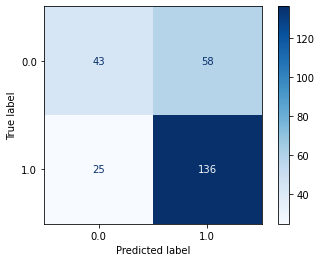

Train score: 0.9679245283018868
Test score: 0.683206106870229
Precision: 0.7010309278350515
Recall: 0.84472049689441


In [97]:
breyer_df = pd.read_pickle("df_merged_breyer.pkl")
breyer_df=breyer_df.reset_index()

X=np.array(breyer_df.pet_text)
y=np.array(breyer_df.final_vote)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y,random_state=42)

vect = TfidfVectorizer(tokenizer=tokenizer, use_idf=False, ngram_range=(1,2), stop_words=None)
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)
    
print("Ratio")
print(np.bincount(y_train.astype(int))[1]/len(y_train))
print()
    
print("SGD")
clf = SGDClassifier(loss='log', random_state=1, penalty='l2', alpha=0.0001, n_iter_no_change=7)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_pred,y_test))
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

print(f'Train score: {clf.score(X_train, y_train)}')
print(f'Test score: {clf.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

##### respondent

Ratio
0.6169811320754717

SGD
[[ 26  21]
 [ 75 140]]


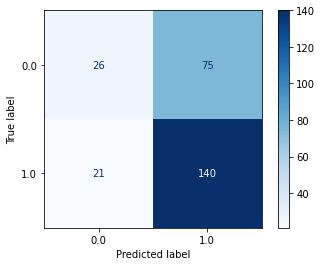

Train score: 0.9528301886792453
Test score: 0.6335877862595419
Precision: 0.6511627906976745
Recall: 0.8695652173913043


In [98]:
breyer_df = pd.read_pickle("df_merged_breyer.pkl")
breyer_df=breyer_df.reset_index()

X=np.array(breyer_df.res_text)
y=np.array(breyer_df.final_vote)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y,random_state=42)

vect = TfidfVectorizer(tokenizer=tokenizer, use_idf=False, ngram_range=(1,2), stop_words=None)
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)
    
print("Ratio")
print(np.bincount(y_train.astype(int))[1]/len(y_train))
print()
    
print("SGD")
clf = SGDClassifier(loss='log', random_state=1, penalty='l2', alpha=0.0001, n_iter_no_change=7)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_pred,y_test))
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

print(f'Train score: {clf.score(X_train, y_train)}')
print(f'Test score: {clf.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

# Gorsuch

Best parameter set:<br>

- 'clf__alpha': 0.001<br>
- 'clf__n_iter_no_change': 3<br>
- 'clf__penalty': 'l1'<br>
- 'vect__ngram_range': (1, 2)<br>
- 'vect__stop_words': stop<br>
- 'vect__tokenizer': tokenizer<br>
- 'vect__use_idf': False <br>
<br>
CV Accuracy: 0.699<br>
Test Accuracy: 0.627<br>

##### petitioner

Ratio
0.6019417475728155

SGD
[[15 13]
 [ 6 17]]


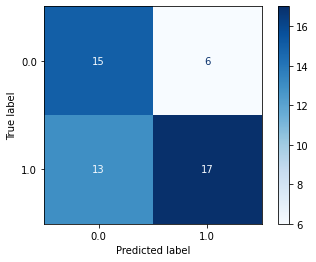

Train score: 0.8640776699029126
Test score: 0.6274509803921569
Precision: 0.7391304347826086
Recall: 0.5666666666666667


In [99]:
gorsuch_df = pd.read_pickle("df_merged_gorsuch.pkl")
gorsuch_df = gorsuch_df.reset_index()

X=np.array(gorsuch_df.pet_text)
y=np.array(gorsuch_df.final_vote)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y,random_state=42)

vect = TfidfVectorizer(tokenizer=tokenizer, use_idf=False, ngram_range=(1,2), stop_words=stop)
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)
    
print("Ratio")
print(np.bincount(y_train.astype(int))[1]/len(y_train))
print()
    
print("SGD")
clf = SGDClassifier(loss='log', random_state=1, penalty='l1', alpha=0.001, n_iter_no_change=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_pred,y_test))
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

print(f'Train score: {clf.score(X_train, y_train)}')
print(f'Test score: {clf.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

##### respondent

Ratio
0.6019417475728155

SGD
[[11  6]
 [10 24]]


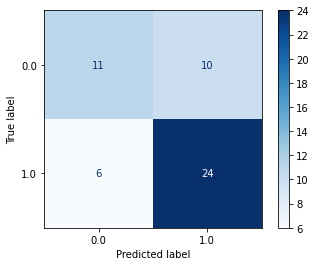

Train score: 0.8349514563106796
Test score: 0.6862745098039216
Precision: 0.7058823529411765
Recall: 0.8


In [100]:
gorsuch_df = pd.read_pickle("df_merged_gorsuch.pkl")
gorsuch_df = gorsuch_df.reset_index()

X=np.array(gorsuch_df.res_text)
y=np.array(gorsuch_df.final_vote)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y,random_state=42)

vect = TfidfVectorizer(tokenizer=tokenizer, use_idf=False, ngram_range=(1,2), stop_words=stop)
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)
    
print("Ratio")
print(np.bincount(y_train.astype(int))[1]/len(y_train))
print()
    
print("SGD")
clf = SGDClassifier(loss='log', random_state=1, penalty='l1', alpha=0.001, n_iter_no_change=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_pred,y_test))
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

print(f'Train score: {clf.score(X_train, y_train)}')
print(f'Test score: {clf.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

# Alito


Best parameter set:<br>

- 'clf__alpha': 0.001<br>
- 'clf__n_iter_no_change': 9<br>
- 'clf__penalty': 'l2'<br>
- 'vect__ngram_range': (1, 2)<br>
- 'vect__stop_words': stop<br>
- 'vect__tokenizer': tokenizer<br>
- 'vect__use_idf': True <br>
<br>
CV Accuracy: 0.674<br>
Test Accuracy: 0.680

##### petitioner

Ratio
0.6052631578947368

SGD
[[ 24   5]
 [ 73 142]]


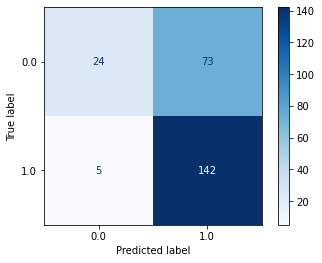

Train score: 0.9534412955465587
Test score: 0.680327868852459
Precision: 0.6604651162790698
Recall: 0.9659863945578231


In [101]:
alito_df = pd.read_pickle("df_merged_alito.pkl")
alito_df = alito_df.reset_index()

X=np.array(alito_df.pet_text)
y=np.array(alito_df.final_vote)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y,random_state=42)

vect = TfidfVectorizer(tokenizer=tokenizer, use_idf=True, ngram_range=(1,2), stop_words=stop)
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)
    
print("Ratio")
print(np.bincount(y_train.astype(int))[1]/len(y_train))
print()
    
print("SGD")
clf = SGDClassifier(loss='log', random_state=1, penalty='l2', alpha=0.001, n_iter_no_change=9)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_pred,y_test))
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

print(f'Train score: {clf.score(X_train, y_train)}')
print(f'Test score: {clf.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

##### respondent

Ratio
0.6052631578947368

SGD
[[  0   1]
 [ 97 146]]


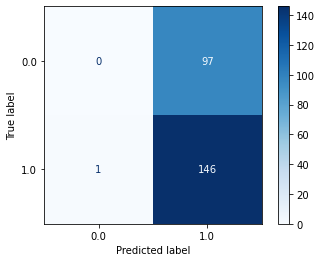

Train score: 0.8603238866396761
Test score: 0.5983606557377049
Precision: 0.6008230452674898
Recall: 0.9931972789115646


In [102]:
alito_df = pd.read_pickle("df_merged_alito.pkl")
alito_df = alito_df.reset_index()

X=np.array(alito_df.res_text)
y=np.array(alito_df.final_vote)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y,random_state=42)

vect = TfidfVectorizer(tokenizer=tokenizer, use_idf=True, ngram_range=(1,2), stop_words=stop)
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)
    
print("Ratio")
print(np.bincount(y_train.astype(int))[1]/len(y_train))
print()
    
print("SGD")
clf = SGDClassifier(loss='log', random_state=1, penalty='l2', alpha=0.001, n_iter_no_change=9)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_pred,y_test))
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

print(f'Train score: {clf.score(X_train, y_train)}')
print(f'Test score: {clf.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

# Thomas

Best parameter set:<br>

- 'clf__alpha': 0.001<br>
- 'clf__n_iter_no_change': 3<br>
- 'clf__penalty': 'l1'<br>
- 'vect__ngram_range': (1, 1)<br>
- 'vect__stop_words': None<br>
- 'vect__tokenizer': tokenizerporter<br>
- 'vect__use_idf': False <br>
<br>
CV Accuracy: 0.595<br>
Test Accuracy: 0.586

##### petitioner

Ratio
0.5797373358348968

SGD
[[  4   3]
 [106 150]]


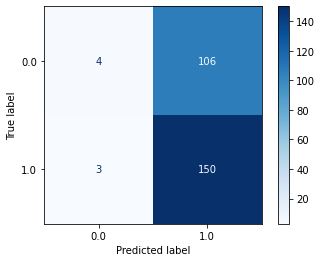

Train score: 0.5928705440900562
Test score: 0.5855513307984791
Precision: 0.5859375
Recall: 0.9803921568627451


In [103]:
thomas_df = pd.read_pickle("df_merged_thomas.pkl")
thomas_df = thomas_df.reset_index()

X=np.array(thomas_df.pet_text)
y=np.array(thomas_df.final_vote)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y,random_state=42)

vect = TfidfVectorizer(tokenizer=tokenizerporter, use_idf=False, ngram_range=(1,1), stop_words=None)
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)
    
print("Ratio")
print(np.bincount(y_train.astype(int))[1]/len(y_train))
print()
    
print("SGD")
clf = SGDClassifier(loss='log', random_state=1, penalty='l1', alpha=0.001, n_iter_no_change=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_pred,y_test))
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

print(f'Train score: {clf.score(X_train, y_train)}')
print(f'Test score: {clf.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

##### respondent

Ratio
0.5797373358348968

SGD
[[  0   0]
 [110 153]]


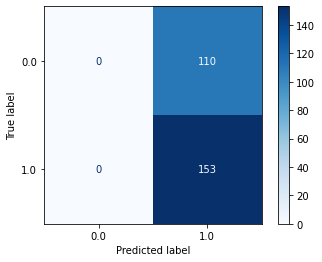

Train score: 0.5797373358348968
Test score: 0.5817490494296578
Precision: 0.5817490494296578
Recall: 1.0


In [104]:
thomas_df = pd.read_pickle("df_merged_thomas.pkl")
thomas_df = thomas_df.reset_index()

X=np.array(thomas_df.res_text)
y=np.array(thomas_df.final_vote)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y,random_state=42)

vect = TfidfVectorizer(tokenizer=tokenizerporter, use_idf=False, ngram_range=(1,1), stop_words=None)
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)
    
print("Ratio")
print(np.bincount(y_train.astype(int))[1]/len(y_train))
print()
    
print("SGD")
clf = SGDClassifier(loss='log', random_state=1, penalty='l1', alpha=0.001, n_iter_no_change=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_pred,y_test))
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

print(f'Train score: {clf.score(X_train, y_train)}')
print(f'Test score: {clf.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

# Kavanaugh

Best parameter set:<br>

- 'clf__alpha': 0.001<br>
- 'clf__n_iter_no_change': 5<br>
- 'clf__penalty': 'l1'<br>
- 'vect__ngram_range': (1, 2)<br>
- 'vect__stop_words': None<br>
- 'vect__tokenizer': tokenizer<br>
- 'vect__use_idf': True <br>
<br>
CV Accuracy: 0.654<br>
Test Accuracy: 0.613

##### petitioner

Ratio
0.5901639344262295

SGD
[[ 7  6]
 [ 6 12]]


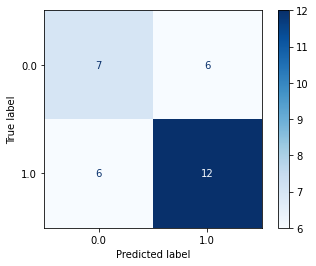

Train score: 0.8688524590163934
Test score: 0.6129032258064516
Precision: 0.6666666666666666
Recall: 0.6666666666666666


In [105]:
kavanaugh_df = pd.read_pickle("df_merged_kavanaugh.pkl")
kavanaugh_df = kavanaugh_df.reset_index()

X=np.array(kavanaugh_df.pet_text)
y=np.array(kavanaugh_df.final_vote)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y,random_state=42)

vect = TfidfVectorizer(tokenizer=tokenizer, use_idf=True, ngram_range=(1,2), stop_words=None)
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)
    
print("Ratio")
print(np.bincount(y_train.astype(int))[1]/len(y_train))
print()
    
print("SGD")
clf = SGDClassifier(loss='log', random_state=1, penalty='l1', alpha=0.001, n_iter_no_change=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_pred,y_test))
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

print(f'Train score: {clf.score(X_train, y_train)}')
print(f'Test score: {clf.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

##### respondent

Ratio
0.5901639344262295

SGD
[[ 0  0]
 [13 18]]


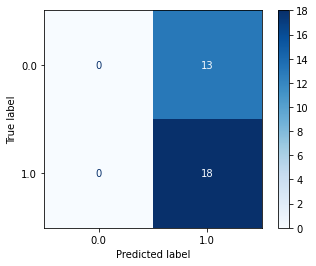

Train score: 1.0
Test score: 0.5806451612903226
Precision: 0.5806451612903226
Recall: 1.0


In [106]:
kavanaugh_df = pd.read_pickle("df_merged_kavanaugh.pkl")
kavanaugh_df = kavanaugh_df.reset_index()

X=np.array(kavanaugh_df.res_text)
y=np.array(kavanaugh_df.final_vote)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y,random_state=42)

vect = TfidfVectorizer(tokenizer=tokenizer, use_idf=True, ngram_range=(1,2), stop_words=None)
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)
    
print("Ratio")
print(np.bincount(y_train.astype(int))[1]/len(y_train))
print()
    
print("SGD")
clf = SGDClassifier(loss='log', random_state=1, penalty='l1', alpha=0.001, n_iter_no_change=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_pred,y_test))
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

print(f'Train score: {clf.score(X_train, y_train)}')
print(f'Test score: {clf.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

# Kagan

Best parameter set:<br>

- 'clf__alpha': 0.0001<br>
- 'clf__n_iter_no_change': 9<br>
- 'clf__penalty': 'l2'<br>
- 'vect__ngram_range': (1, 2)<br>
- 'vect__stop_words': None<br>
- 'vect__tokenizer': tokenizer<br>
- 'vect__use_idf': True <br>
<br>
CV Accuracy: 0.655<br>
Test Accuracy: 0.634

##### petitioner

Ratio
0.6246153846153846

SGD
[[12 10]
 [49 90]]


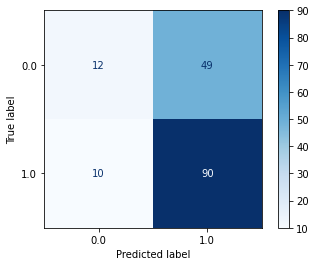

Train score: 0.9876923076923076
Test score: 0.6335403726708074
Precision: 0.6474820143884892
Recall: 0.9


In [107]:
kagan_df = pd.read_pickle("df_merged_kagan.pkl")
kagan_df = kagan_df.reset_index()

X=np.array(kagan_df.pet_text)
y=np.array(kagan_df.final_vote)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y,random_state=42)

vect = TfidfVectorizer(tokenizer=tokenizer, use_idf=True, ngram_range=(1,2), stop_words=None)
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)
    
print("Ratio")
print(np.bincount(y_train.astype(int))[1]/len(y_train))
print()
    
print("SGD")
clf = SGDClassifier(loss='log', random_state=1, penalty='l2', alpha=0.0001, n_iter_no_change=9)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_pred,y_test))
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

print(f'Train score: {clf.score(X_train, y_train)}')
print(f'Test score: {clf.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

##### respondent

Ratio
0.6246153846153846

SGD
[[ 9  7]
 [52 93]]


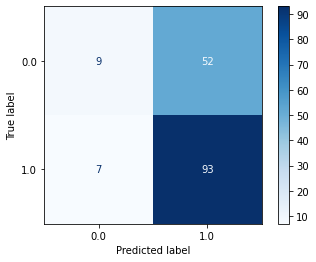

Train score: 0.9476923076923077
Test score: 0.6335403726708074
Precision: 0.6413793103448275
Recall: 0.93


In [108]:
kagan_df = pd.read_pickle("df_merged_kagan.pkl")
kagan_df = kagan_df.reset_index()

X=np.array(kagan_df.res_text)
y=np.array(kagan_df.final_vote)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y,random_state=42)

vect = TfidfVectorizer(tokenizer=tokenizer, use_idf=True, ngram_range=(1,2), stop_words=None)
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)
    
print("Ratio")
print(np.bincount(y_train.astype(int))[1]/len(y_train))
print()
    
print("SGD")
clf = SGDClassifier(loss='log', random_state=1, penalty='l2', alpha=0.0001, n_iter_no_change=9)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_pred,y_test))
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

print(f'Train score: {clf.score(X_train, y_train)}')
print(f'Test score: {clf.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

# Sotomayor

Best parameter set:<br>

- 'clf__alpha': 0.001<br>
- 'clf__n_iter_no_change': 3<br>
- 'clf__penalty': 'l1'<br>
- 'vect__ngram_range': (1, 2)<br>
- 'vect__stop_words': None<br>
- 'vect__tokenizer': tokenizerporter<br>
- 'vect__use_idf': False <br>
<br>
CV Accuracy: 0.655<br>
Test Accuracy: 0.562

##### petitioner

Ratio
0.6005154639175257

SGD
[[  7  14]
 [ 70 101]]


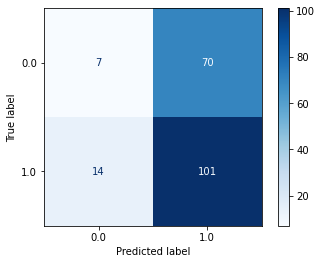

Train score: 0.6855670103092784
Test score: 0.5625
Precision: 0.5906432748538012
Recall: 0.8782608695652174


In [109]:
sotomayor_df = pd.read_pickle("df_merged_sotomayor.pkl")
sotomayor_df = sotomayor_df.reset_index()

X=np.array(sotomayor_df.pet_text)
y=np.array(sotomayor_df.final_vote)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y,random_state=42)

vect = TfidfVectorizer(tokenizer=tokenizerporter, use_idf=False, ngram_range=(1,2), stop_words=None)
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)
    
print("Ratio")
print(np.bincount(y_train.astype(int))[1]/len(y_train))
print()
    
print("SGD")
clf = SGDClassifier(loss='log', random_state=1, penalty='l1', alpha=0.001, n_iter_no_change=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_pred,y_test))
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

print(f'Train score: {clf.score(X_train, y_train)}')
print(f'Test score: {clf.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

##### respondent

Ratio
0.6005154639175257

SGD
[[ 12  12]
 [ 65 103]]


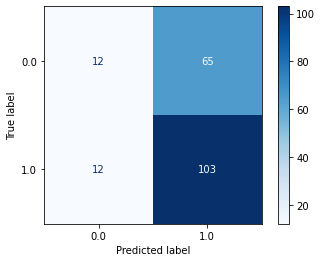

Train score: 0.6494845360824743
Test score: 0.5989583333333334
Precision: 0.6130952380952381
Recall: 0.8956521739130435


In [110]:
sotomayor_df = pd.read_pickle("df_merged_sotomayor.pkl")
sotomayor_df = sotomayor_df.reset_index()

X=np.array(sotomayor_df.res_text)
y=np.array(sotomayor_df.final_vote)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y,random_state=42)

vect = TfidfVectorizer(tokenizer=tokenizerporter, use_idf=False, ngram_range=(1,2), stop_words=None)
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)
    
print("Ratio")
print(np.bincount(y_train.astype(int))[1]/len(y_train))
print()
    
print("SGD")
clf = SGDClassifier(loss='log', random_state=1, penalty='l1', alpha=0.001, n_iter_no_change=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_pred,y_test))
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

print(f'Train score: {clf.score(X_train, y_train)}')
print(f'Test score: {clf.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

# Roberts

Best parameter set:<br>

- 'clf__alpha': 0.001<br>
- 'clf__n_iter_no_change': 3<br>
- 'vect__ngram_range': (1, 2)<br>
- 'vect__stop_words': stop<br>
- 'vect__use_idf': False <br>
<br>

These were set and not grid searched:

- 'clf__penalty': 'l1'<br>
- 'vect__tokenizer': tokenizerporter<br>

CV Accuracy: 0.655<br>
Test Accuracy: 0.562

##### petitioner

/Users/anndi.russell/opt/anaconda3/envs/cap1/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', "it'", 'onc', 'onli', 'ourselv', "she'", "should'v", 'themselv', 'thi', 'veri', 'wa', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Ratio
0.6481113320079522

SGD
[[ 16   6]
 [ 71 156]]


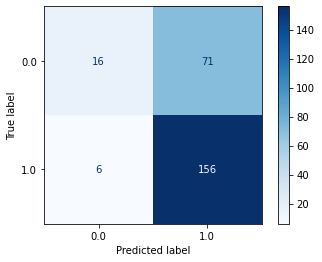

Train score: 0.6858846918489065
Test score: 0.6907630522088354
Precision: 0.6872246696035242
Recall: 0.9629629629629629


In [111]:
roberts_df = pd.read_pickle("df_merged_roberts.pkl")
roberts_df = roberts_df.reset_index()

X=np.array(roberts_df.pet_text)
y=np.array(roberts_df.final_vote)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y,random_state=42)

vect = TfidfVectorizer(tokenizer=tokenizerporter, use_idf=False, ngram_range=(1,2), stop_words=stop)
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)
    
print("Ratio")
print(np.bincount(y_train.astype(int))[1]/len(y_train))
print()
    
print("SGD")
clf = SGDClassifier(loss='log', random_state=1, penalty='l1', alpha=0.001, n_iter_no_change=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_pred,y_test))
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

print(f'Train score: {clf.score(X_train, y_train)}')
print(f'Test score: {clf.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

##### respondent

/Users/anndi.russell/opt/anaconda3/envs/cap1/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', "it'", 'onc', 'onli', 'ourselv', "she'", "should'v", 'themselv', 'thi', 'veri', 'wa', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Ratio
0.6481113320079522

SGD
[[ 15  13]
 [ 72 149]]


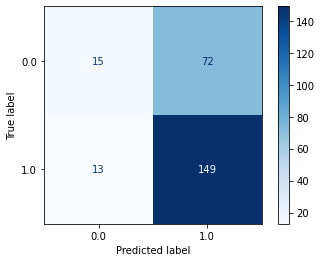

Train score: 0.6898608349900597
Test score: 0.6586345381526104
Precision: 0.6742081447963801
Recall: 0.9197530864197531


In [112]:
roberts_df = pd.read_pickle("df_merged_roberts.pkl")
roberts_df = roberts_df.reset_index()

X=np.array(roberts_df.res_text)
y=np.array(roberts_df.final_vote)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y,random_state=42)

vect = TfidfVectorizer(tokenizer=tokenizerporter, use_idf=False, ngram_range=(1,2), stop_words=stop)
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)
    
print("Ratio")
print(np.bincount(y_train.astype(int))[1]/len(y_train))
print()
    
print("SGD")
clf = SGDClassifier(loss='log', random_state=1, penalty='l1', alpha=0.001, n_iter_no_change=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_pred,y_test))
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

print(f'Train score: {clf.score(X_train, y_train)}')
print(f'Test score: {clf.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')